# Python Assessment
---

In this notebook, we will ask you to find the numerical summaries for a certain set of data. You will use the values of what you find in this assignment to answer questions in the quiz that follows.

We will also ask you to create some of the plots you have seen in the previous lectures.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)

path = "/Users/rajdeep_ch/Documents/courses/Statistics with Python/course1/nhanes_data.csv"

In [3]:
df = pd.read_csv(path)

df.head()
print(df.shape)

(5735, 28)


In [18]:
# Lets only consider the variable 'BPXSY2' 

bp = df['BPXSY2']

bp.head()

0    124.0
1    140.0
2    132.0
3    134.0
4    114.0
Name: BPXSY2, dtype: float64

---

## Numerical Summaries

Find the mean

In [10]:
bp_mean = np.mean(bp)

bp_mean

124.78301716350497

In [14]:
pd.isna(bp).sum()

200

.dropna()

To make sure we know that we aren't treating missing data in ways that we don't want, lets go ahead and drop all the nans from our Series 'bp'.

In [34]:
bp = bp.dropna()

### Find the:

- Median
- Max
- Min
- Standard Deviation
- Variance

#### Example:

Find the difference of an element in 'bp' compared with the previous element in 'bp'.

In [19]:
# Using the fact that 'bp' is a pd.Series object, can use the pd.Series method diff()
# call this method by: pd.Series.diff()

diff_by_series_method = bp.diff()

# note that this returns a pd.Series object that has an index associated with it

diff_by_series_method           # returns the index and the values
diff_by_series_method.values    # returns only the values

array([ nan,  16.,  -8., ...,  30., -40.,   8.])

In [21]:
# Now use the numpy library instead to find the same values
# np.diff(array)

diff_by_np_method = np.diff(bp)
diff_by_np_method

# note that this returns an 'numpy.ndarray', which has no index associated with it, and therefore ignores
# the nan we get by the Series method

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

In [22]:
# We could also implement this ourselves with some looping

diff_by_me = []

for i in range(len(bp.values)-1):
    
    diff = bp.values[i+1] - bp.values[i]
    diff_by_me.append(diff)

np.array(diff_by_me)

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

### Find these values for the quiz that follows

In [40]:
bp_median = np.median(np.array(bp))
bp_median

122.0

In [26]:
bp_max = max(bp)
bp_max

238.0

In [27]:
bp_min = min(bp)
bp_min

84.0

In [41]:
bp_std = np.std(bp)
bp_std

18.525338021233832

In [42]:
bp_var = np.var(bp)
bp_var

343.1881488009719

Finding the Interquartile range

In [43]:
bp_iqr = stats.iqr(bp)
bp_iqr

22.0

### Visualizing the data

In [45]:
# use the Series.describe() method to see some descriptive statistics of our Series 'bp'.

bp_descriptive_stats = bp.describe()
bp_descriptive_stats

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

/Users/rajdeep_ch/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Histogram for 'BPXSY2'")

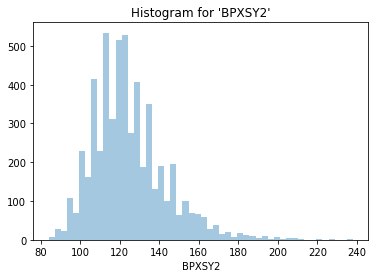

In [47]:
# Make a histogram of our 'bp' data using the seaborn library we imported as 'sns'.

sns.distplot(bp,kde=False)
plt.title("Histogram for 'BPXSY2'")

/Users/rajdeep_ch/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "Boxplot for 'BPXSY2'")

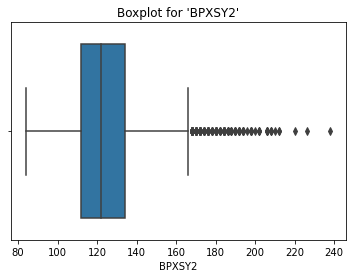

In [49]:
# Make a boxplot of our 'bp' data using the seaborn library. Make sure it has title and labels!

sns.boxplot(bp)
plt.title("Boxplot for 'BPXSY2'")